# Movie Pair Recommendation 

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/movie pair recommendation dataset.csv')
df.shape

(500, 4)

In [6]:
df.head()

,movie_name,movie_rating,movie_review,movie_label
0,Solaris Gate,4,"Decent, but not memorable. You won't miss much...",moderate
1,Ocean's Enigma,2,A complete waste of time. The plot made no sense.,bad
2,Quantum Leap,6,It's a solid 6/10. Good for a casual watch.,moderate
3,Forgotten Dynasty,6,"Decent, but not memorable. You won't miss much...",moderate
4,Quantum Leap,9,Fantastic cinematography and a deeply moving p...,good


## Data Preprocessing 

In [ ]:
print(df.isnull().sum())
df_clean = df.dropna()
print(f"Rows: {len(df_clean)}, Columns: {df_clean.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_name    500 non-null    object
 1   movie_rating  500 non-null    int64 
 2   movie_review  500 non-null    object
 3   movie_label   500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
movie_name      0
movie_rating    0
movie_review    0
movie_label     0
dtype: int64
Original rows: 500, After removing nulls: 500


In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

movies_list = df_clean.groupby(['movie_rating'])['movie_name'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(movies_list).transform(movies_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction Groups: {len(df_encoded)}, Unique Movies: {len(te.columns_)}")

Transaction Groups: 10, Unique Movies: 12


## Training

In [20]:
frequent_itemsets = apriori(df_encoded, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1) | rules['consequents'].apply(lambda x: len(x) == 1)]
rules = rules.sort_values('confidence', ascending=False).head(20)

print(f"Frequent Itemsets: {len(frequent_itemsets)}")
print(f"Association Rules (filtered): {len(rules)}\n")
if len(rules) > 0:
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

c:\conda\envs\mlprojectenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Frequent Itemsets: 4095
Association Rules (filtered): 20

                                              antecedents  \
523246                             (Whispers in the Void)   
519160  (The Crimson Shadow, Project Gemini, Echoes of...   
519158  (The Crimson Shadow, Project Gemini, Echoes of...   
519157  (The Crimson Shadow, Project Gemini, Echoes of...   
519156  (The Crimson Shadow, Project Gemini, Echoes of...   
519153                             (Whispers in the Void)   
32                                    (Echoes of Neptune)   
31                                    (Echoes of Neptune)   
30                                         (Quantum Leap)   
29                                       (Project Gemini)   
28                                    (Echoes of Neptune)   
27                                    (Echoes of Neptune)   
26                                       (Ocean's Enigma)   
25                                    (Echoes of Neptune)   
24                         

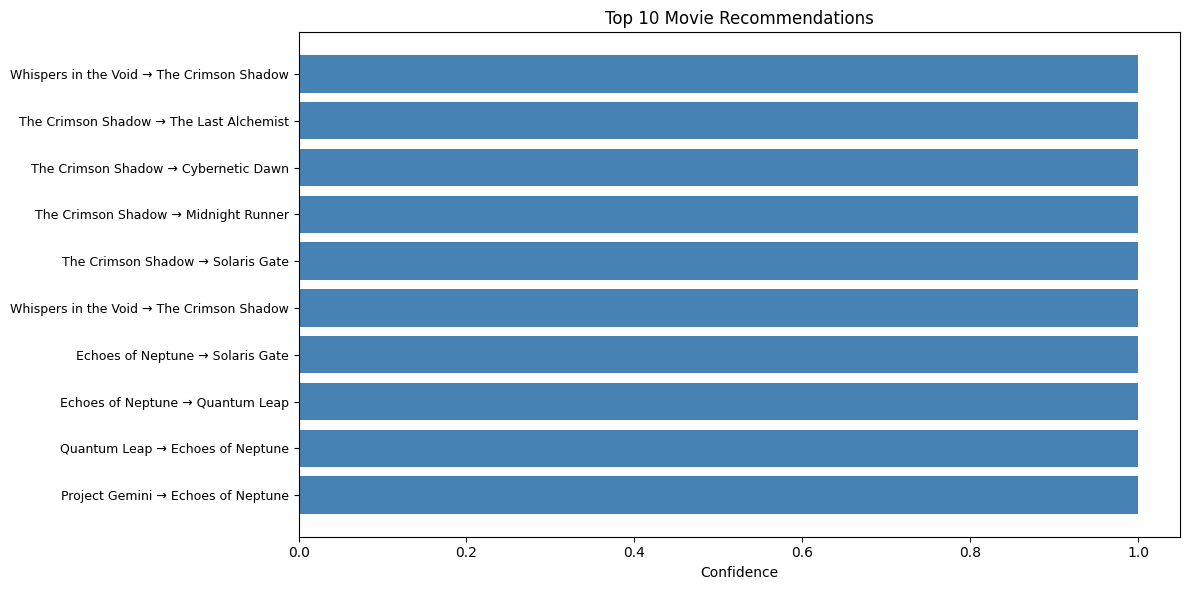

In [15]:
top_rules = rules.nlargest(10, 'confidence')
top_rules['movie_pair'] = top_rules['antecedents'].apply(lambda x: list(x)[0]) + ' → ' + top_rules['consequents'].apply(lambda x: list(x)[0])

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(range(len(top_rules)), top_rules['confidence'], color='steelblue')
ax.set_yticks(range(len(top_rules)))
ax.set_yticklabels(top_rules['movie_pair'], fontsize=9)
ax.set_xlabel('Confidence')
ax.set_title('Top 10 Movie Recommendations')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
print("="*60)
print("MOVIE PAIR RECOMMENDATION RESULTS")
print("="*60)
print(f"\nTotal Rules: {len(rules)}")
print(f"Avg Confidence: {rules['confidence'].mean():.3f}")
print(f"Avg Lift: {rules['lift'].mean():.3f}")
print(f"High Confidence Rules (>0.8): {len(rules[rules['confidence'] > 0.8])}")
print("="*60)

MOVIE PAIR RECOMMENDATION RESULTS

Total Rules: 20
Avg Confidence: 1.000
Avg Lift: 1.000
High Confidence Rules (>0.8): 20


Thanks!